In [173]:
%load_ext autoreload
%autoreload 2


from sklearn.linear_model import LogisticRegression, LinearRegression

import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from logistic_regression import logistic
from scipy.stats.mstats import mquantiles
import seaborn as sns
import scipy.stats
from plot_utils import PlotInfo, save_freq_acc_plot_and_get_info, save_logistic_regression_lines_plot_for_shots, save_logistic_regression_lines_plot_for_models, save_logistic_regression_lines_plot_for_models_shots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
sns.set_theme(style="white", palette="pastel")

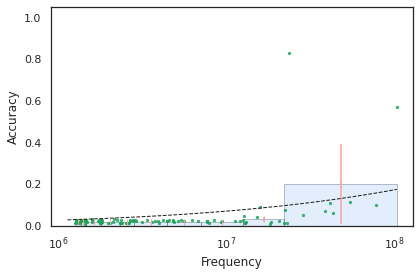

0 : 0.05431372549019608


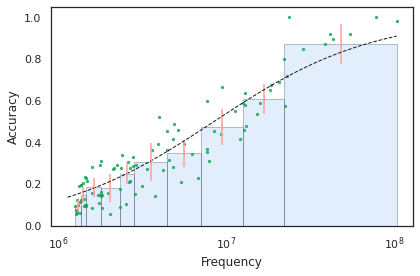

2 : 0.35939584150647313


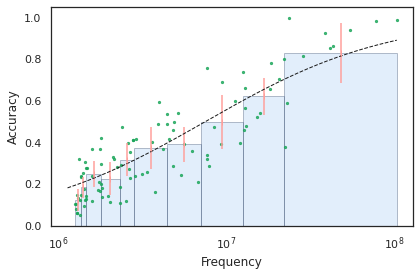

4 : 0.39218995290423864


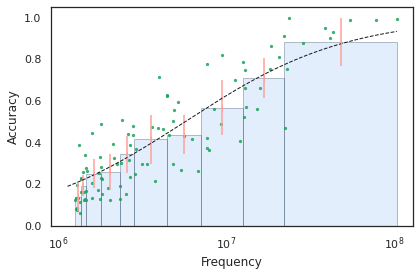

8 : 0.4293008641005499


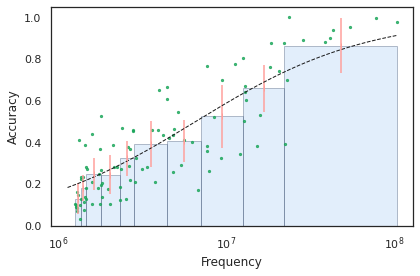

16 : 0.4088512981904013


In [194]:
WORD = 'mult'
MODEL = 'gptj'
for shots in [0, 2, 4 ,8, 16]:
    a = save_freq_acc_plot_and_get_info(WORD, shots, MODEL, key='x', show_plot = True)
    print(shots, ":", a.accuracy_all)


In [ ]:
q = save_freq_acc_plot_and_get_info('day', 2, 'gptj', key='xz', show_plot = True, quantile_number=2)

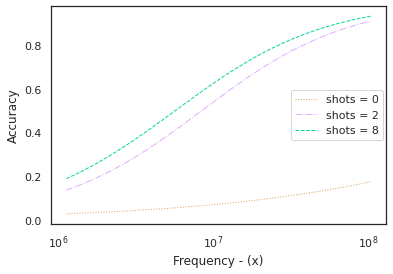

In [183]:
save_logistic_regression_lines_plot_for_shots('mult', 'gptj', shots=[0, 2, 8], key='x', show_plot=True)

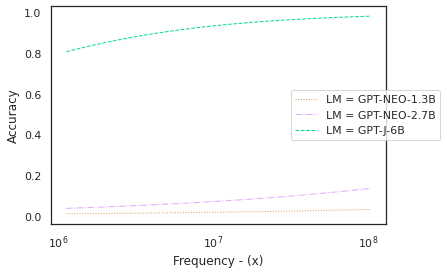

In [184]:
save_logistic_regression_lines_plot_for_models('plus', ['gptjsmall', 'gptjlarge', 'gptj'], shot=2, key='x', show_plot=True)

## For Latex Results

In [132]:

def create_arithmetics_similarity_1():
    arithmetics_task_1_path = './latex_results/arithmetics-gptj.csv'
    template_header = "\\multirow{{{0}}}{{*}}{{{1}}} & {2} & {3:.2f} & {4:.2f} & {5:.2f}\\\\\n"
    template_row = "& {0} & {1:.2f} & {2:.2f} & {3:.2f}\\\\\n"
    footer = "\midrule\n"
    result = {
        'Task': [],
        'Model': [],
        '#Shot': [],
        'Accuracy': [],
        'Similarity_x': [],
        'Similarity_xy': [],
        'Similarity_xz': [],
    }
    latex_content = ""
    for (task, word) in [('Multiplication', 'mult'), ('Addition', 'plus')]:
        task_result = []
        for model in ['gptj']:
            for shot in [0, 2, 4, 8, 20]:
                result['Task'].append(task)
                result['Model'].append(model)
                result['#Shot'].append(shot)
                plot_info_x = PlotInfo(word, shot, model, key_type='x') \
                    .quantile_accuracies_plot(q_num=10) \
                    .calculate_accuracy_all()
                result['Accuracy'].append(plot_info_x.accuracy_all)
                result['Similarity_x'].append(plot_info_x.similarity)
                result['Similarity_xy'].append(
                    PlotInfo(word, shot, model, key_type='xy').quantile_accuracies_plot(q_num=10).similarity)
                result['Similarity_xz'].append(
                    PlotInfo(word, shot, model, key_type='xz').quantile_accuracies_plot(q_num=10).similarity)
                task_result.append([result['#Shot'][-1], result['Accuracy'][-1], result['Similarity_x'][-1], result['Similarity_xy'][-1]])
        latex_content += template_header.format(len(task_result), task, task_result[0][0], task_result[0][1], task_result[0][2], task_result[0][3])
        for tt in task_result[1:]:
            latex_content += template_row.format(*tt)
        latex_content += footer
    pd.DataFrame(result).to_csv(arithmetics_task_1_path)
    print(latex_content)


create_arithmetics_similarity_1()




I'm at index 9999999, lines: (('274087', '300671'), 1)

\multirow{5}{*}{Multiplication} & 0 & 0.05 & 0.18 & 0.21\\
& 2 & 0.37 & 0.72 & 0.78\\
& 4 & 0.39 & 0.67 & 0.76\\
& 8 & 0.41 & 0.71 & 0.78\\
& 20 & 0.40 & 0.79 & 0.80\\
\midrule
\multirow{5}{*}{Addition} & 0 & 0.02 & 0.08 & 0.07\\
& 2 & 0.90 & 0.13 & 0.17\\
& 4 & 0.92 & 0.09 & 0.16\\
& 8 & 0.92 & 0.15 & 0.24\\
& 20 & 0.86 & 0.19 & 0.30\\
\midrule



In [133]:

def create_comparison_similarity_1():
    comparison_task_1_path = './latex_results/comparison-gptj.csv'
    template_header = "\\multirow{{{0}}}{{*}}{{{1}}} & {2} & {3:.2f} & {4:.2f} & {5:.2f}\\\\\n"
    template_row = "& {0} & {1:.2f} & {2:.2f} & {3:.2f}\\\\\n"
    footer = "\midrule\n"
    result = {
        'Task': [],
        'Model': [],
        '#Shot': [],
        'Accuracy': [],
        'Similarity_x': [],
        'Similarity_xy': [],
        'Similarity_xz': [],
    }
    latex_content = ""
    for (task, word) in [('Min', 'compareless'), ('Max', 'comparemore')]:
        task_result = []
        for model in ['gptj']:
            for shot in [0, 2, 4, 8, 20]:
                result['Task'].append(task)
                result['Model'].append(model)
                result['#Shot'].append(shot)
                plot_info_x = PlotInfo(word, shot, model, key_type='x') \
                    .quantile_accuracies_plot(q_num=10) \
                    .calculate_accuracy_all()
                result['Accuracy'].append(plot_info_x.accuracy_all)
                result['Similarity_x'].append(plot_info_x.similarity)
                result['Similarity_xy'].append(
                    PlotInfo(word, shot, model, key_type='xy').quantile_accuracies_plot(q_num=10).similarity)
                result['Similarity_xz'].append(
                    PlotInfo(word, shot, model, key_type='xz').quantile_accuracies_plot(q_num=10).similarity)
                task_result.append([result['#Shot'][-1], result['Accuracy'][-1], result['Similarity_x'][-1], result['Similarity_xy'][-1]])
        latex_content += template_header.format(len(task_result), task, task_result[0][0], task_result[0][1], task_result[0][2], task_result[0][3])
        for tt in task_result[1:]:
            latex_content += template_row.format(*tt)
        latex_content += footer
    pd.DataFrame(result).to_csv(comparison_task_1_path)
    print(latex_content)


create_comparison_similarity_1()

\multirow{5}{*}{Min} & 0 & 0.00 & 0.02 & 0.00\\
& 2 & 0.56 & 0.60 & 0.03\\
& 4 & 0.69 & 0.10 & -0.14\\
& 8 & 0.78 & -0.11 & -0.15\\
& 20 & 0.86 & 0.07 & -0.14\\
\midrule
\multirow{5}{*}{Max} & 0 & 0.00 & 0.00 & 0.00\\
& 2 & 0.64 & 0.08 & -0.04\\
& 4 & 0.65 & -0.21 & 0.06\\
& 8 & 0.65 & -0.29 & 0.11\\
& 20 & 0.75 & -0.26 & -0.16\\
\midrule



In [172]:
def create_timeunits_similarity_1():
    timeunits_task_1_path = './latex_results/timeunits-gptj.csv'
    template_header = "\\multirow{{{0}}}{{*}}{{{1}}} & {2} & {3:.2f} & {4:.2f} & {5:.2f}\\\\\n"
    template_row = "& {0} & {1:.2f} & {2:.2f} & {3:.2f}\\\\\n"
    footer = "\midrule\n"
    result = {
        'Task': [],
        'Model': [],
        '#Shot': [],
        'Accuracy': [],
        'Similarity_x': [],
        'Similarity_xy': [],
        # 'Similarity_xz': [],
    }
    latex_content = ""
    for (task, word) in [('Min2Sec', 'minute'), ('Hour2Min', 'hour'), ('Day2Hour', 'day'), ('Month2Week', 'month'), ('Year2Month', 'year'), ('Decade2Year', 'decade')]:
        task_result = []
        for model in ['gptj']:
            for shot in [2, 4, 8]:
                result['Task'].append(task)
                result['Model'].append(model)
                result['#Shot'].append(shot)
                plot_info_x = PlotInfo(word, shot, model, key_type='x') \
                    .quantile_accuracies_plot(q_num=10) \
                    .calculate_accuracy_all()
                result['Accuracy'].append(plot_info_x.accuracy_all)
                result['Similarity_x'].append(plot_info_x.similarity)
                result['Similarity_xy'].append(
                    PlotInfo(word, shot, model, key_type='xy').quantile_accuracies_plot(q_num=10).similarity)
                # result['Similarity_xz'].append(
                #     PlotInfo(word, shot, model, key_type='xz').quantile_accuracies_plot(q_num=10).similarity)
                task_result.append([result['#Shot'][-1], result['Accuracy'][-1], result['Similarity_x'][-1], result['Similarity_xy'][-1]])
        latex_content += template_header.format(len(task_result), task, task_result[0][0], task_result[0][1], task_result[0][2], task_result[0][3])
        for tt in task_result[1:]:
            latex_content += template_row.format(*tt)
        latex_content += footer
    pd.DataFrame(result).to_csv(timeunits_task_1_path)
    with open(timeunits_task_1_path+".txt", "w") as f:
        f.write(latex_content)
    print(latex_content)


create_timeunits_similarity_1()

Total Not Found for key xy is 9
Total Not Found for key xy is 9
Total Not Found for key xy is 9
Total Not Found for key xy is 159
Total Not Found for key xy is 154
Total Not Found for key xy is 146
\multirow{3}{*}{Min2Sec} & 2 & 0.19 & 0.54 & 0.54\\
& 4 & 0.39 & 0.54 & 0.77\\
& 8 & 0.47 & 0.65 & 0.73\\
\midrule
\multirow{3}{*}{Hour2Min} & 2 & 0.22 & 0.65 & 0.36\\
& 4 & 0.26 & 0.64 & 0.41\\
& 8 & 0.38 & 0.71 & 0.48\\
\midrule
\multirow{3}{*}{Day2Hour} & 2 & 0.10 & 0.25 & 0.20\\
& 4 & 0.19 & 0.32 & 0.24\\
& 8 & 0.31 & 0.55 & 0.47\\
\midrule
\multirow{3}{*}{Month2Week} & 2 & 0.36 & -0.14 & -0.09\\
& 4 & 0.75 & 0.17 & 0.15\\
& 8 & 0.79 & 0.34 & 0.33\\
\midrule
\multirow{3}{*}{Year2Month} & 2 & 0.22 & 0.58 & 0.60\\
& 4 & 0.29 & 0.64 & 0.61\\
& 8 & 0.53 & 0.73 & 0.75\\
\midrule
\multirow{3}{*}{Decade2Year} & 2 & 0.75 & 0.28 & 0.36\\
& 4 & 0.96 & 0.00 & 0.00\\
& 8 & 1.00 & 0.00 & 0.00\\
\midrule



In [181]:
def create_generic_similarity_2(name: str, list_of_tasks, shots):
    generic_task_1_path = f'./latex_results/{name}-gptj-2.csv'
    template_header = "\\multirow{{{0}}}{{*}}{{{1}}} & {2} & {3:.2f} & {4:.2f} & {5:.2f}& {6:.2f} & {7:.2f}\\\\\n"
    template_row = "& {0} & {1:.2f} & {2:.2f} & {3:.2f}& {4:.2f} & {5:.2f}\\\\\n"
    footer = "\midrule\n"
    csv_rows = {
        'Task': [],
        'Model': [],
        '#Shot': [],
        'Accuracy': [],
        'Q0_Acc_x': [],
        'Q-1_Acc_x': [],
        'Q0_Acc_xy': [],
        'Q-1_Acc_xy': [],
        'Q0_Acc_xz': [],
        'Q-1_Acc_xz': [],
        'Similarity_x': [],
        'Similarity_xy': [],
        'Similarity_xz': [],
    }
    latex_content = ""
    q_num = 10
    for (task, word) in list_of_tasks:
        latex_result_multirow = []
        for model in ['gptj']:
            for shot in shots:
                csv_rows['Task'].append(task)
                csv_rows['Model'].append(model)
                csv_rows['#Shot'].append(shot)
                for key_type in ['x', 'xy', 'xz']:
                    plot_info = PlotInfo(word, shot, model, key_type=key_type) \
                        .quantile_accuracies_plot(q_num=q_num) \
                        .calculate_accuracy_all()
                    if key_type == 'x':
                        csv_rows['Accuracy'].append(plot_info.accuracy_all)
                    csv_rows[f'Q0_Acc_{key_type}'].append(plot_info.quantile_bins['accuracies'][0])
                    csv_rows[f'Q-1_Acc_{key_type}'].append(plot_info.quantile_bins['accuracies'][-1])
                    csv_rows[f'Similarity_{key_type}'].append(plot_info.similarity)
                latex_result_multirow.append([csv_rows['#Shot'][-1], csv_rows['Accuracy'][-1], csv_rows['Similarity_x'][-1], csv_rows['Similarity_xy'][-1],csv_rows['Similarity_x'][-1]/csv_rows['Accuracy'][-1], csv_rows['Similarity_xy'][-1]/csv_rows['Accuracy'][-1]])
        latex_content += template_header.format(len(latex_result_multirow), task, *latex_result_multirow[0])
        for tt in latex_result_multirow[1:]:
            latex_content += template_row.format(*tt)
        latex_content += footer
    pd.DataFrame(csv_rows).to_csv(generic_task_1_path)
    with open(generic_task_1_path+".txt", "w") as f:
        f.write(latex_content)
    print(latex_content)


create_generic_similarity_2("arithmetics", [('Multiplication', 'mult'), ('Addition', 'plus')], [0, 2, 4, 8, 16])
# create_generic_similarity_2("comparison", [('Min', 'compareless'), ('Max', 'comparemore')], [0, 2, 4, 8, 20])
create_generic_similarity_2("timeunits", [('Min2Sec', 'minute'), ('Hour2Min', 'hour'), ('Day2Hour', 'day'), ('Month2Week', 'month'), ('Year2Month', 'year'), ('Decade2Year', 'decade')], [2, 4, 8])


\multirow{5}{*}{Multiplication} & 0 & 0.05 & 0.18 & 0.21& 3.31 & 3.80\\
& 2 & 0.36 & 0.78 & 0.79& 2.16 & 2.21\\
& 4 & 0.39 & 0.71 & 0.76& 1.81 & 1.95\\
& 8 & 0.43 & 0.75 & 0.81& 1.74 & 1.88\\
& 16 & 0.41 & 0.73 & 0.78& 1.79 & 1.90\\
\midrule
\multirow{5}{*}{Addition} & 0 & 0.02 & 0.08 & 0.07& 5.35 & 4.38\\
& 2 & 0.88 & 0.17 & 0.22& 0.19 & 0.25\\
& 4 & 0.91 & 0.15 & 0.25& 0.16 & 0.27\\
& 8 & 0.90 & 0.16 & 0.27& 0.18 & 0.30\\
& 16 & 0.89 & 0.16 & 0.27& 0.18 & 0.31\\
\midrule

Total Not Found for key xz is 206
Total Not Found for key xz is 201
Total Not Found for key xz is 194
Total Not Found for key xy is 9
Total Not Found for key xz is 347
Total Not Found for key xy is 9
Total Not Found for key xz is 340
Total Not Found for key xy is 9
Total Not Found for key xz is 324
Total Not Found for key xz is 230
Total Not Found for key xz is 228


/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Total Not Found for key xz is 215
Total Not Found for key xz is 207
Total Not Found for key xz is 204
Total Not Found for key xz is 194
Total Not Found for key xz is 221
Total Not Found for key xz is 214
Total Not Found for key xz is 206
Total Not Found for key xy is 159
Total Not Found for key xz is 251
Total Not Found for key xy is 154
Total Not Found for key xz is 246
Total Not Found for key xy is 146
Total Not Found for key xz is 229
\multirow{3}{*}{Min2Sec} & 2 & 0.25 & 0.62 & 0.68& 2.46 & 2.65\\
& 4 & 0.35 & 0.60 & 0.72& 1.69 & 2.02\\
& 8 & 0.50 & 0.72 & 0.79& 1.45 & 1.58\\
\midrule
\multirow{3}{*}{Hour2Min} & 2 & 0.19 & 0.58 & 0.40& 2.99 & 2.09\\
& 4 & 0.29 & 0.76 & 0.51& 2.63 & 1.74\\
& 8 & 0.36 & 0.75 & 0.53& 2.05 & 1.44\\
\midrule
\multirow{3}{*}{Day2Hour} & 2 & 0.12 & 0.29 & 0.24& 2.38 & 1.98\\
& 4 & 0.23 & 0.46 & 0.45& 2.04 & 1.98\\
& 8 & 0.31 & 0.59 & 0.52& 1.91 & 1.70\\
\midrule
\multirow{3}{*}{Month2Week} & 2 & 0.30 & 0.08 & 0.09& 0.28 & 0.31\\
& 4 & 0.63 & 0.23 & 0.26& 

In [193]:
def create_generic_similarity_3(name: str, list_of_tasks, shots):
    generic_task_1_path = f'./latex_results/{name}-gptj-3.csv'
    template_header = "\\multirow{{{0}}}{{*}}{{{1}}} & {2} & {3:.2f} & {4:.2f} & {5:.2f} & {6:.2f}\\\\\n"
    template_row = "& {0} & {1:.2f} & {2:.2f} & {3:.2f} & {4:.2f}\\\\\n"
    footer = "\midrule\n"
    csv_rows = {
        'Task': [],
        'Model': [],
        '#Shot': [],
        'Accuracy': [],
        'Q0_Acc_x': [],
        'Q-1_Acc_x': [],
        'Q0_Acc_xy': [],
        'Q-1_Acc_xy': [],
        'Q0_Acc_xz': [],
        'Q-1_Acc_xz': [],
        'Similarity_x': [],
        'Similarity_xy': [],
        'Similarity_xz': [],
    }
    latex_content = ""
    q_num = 10
    for (task, word) in list_of_tasks:
        print("Task: ", task)
        latex_result_multirow = []
        for model in ['gptj']:
            for shot in shots:
                csv_rows['Task'].append(task)
                csv_rows['Model'].append(model)
                csv_rows['#Shot'].append(shot)
                for key_type in ['x', 'xy', 'xz']:
                    plot_info = PlotInfo(word, shot, model, key_type=key_type) \
                        .quantile_accuracies_plot(q_num=q_num) \
                        .calculate_accuracy_all()
                    if key_type == 'x':
                        csv_rows['Accuracy'].append(plot_info.accuracy_all)
                    csv_rows[f'Q0_Acc_{key_type}'].append(plot_info.quantile_bins['accuracies'][0])
                    csv_rows[f'Q-1_Acc_{key_type}'].append(plot_info.quantile_bins['accuracies'][-1])
                    csv_rows[f'Similarity_{key_type}'].append(plot_info.similarity)
                latex_result_multirow.append([csv_rows['#Shot'][-1], 100*csv_rows['Accuracy'][-1], 100*csv_rows['Similarity_x'][-1],100*csv_rows['Similarity_xy'][-1], 100*csv_rows['Similarity_xz'][-1]])
        latex_content += template_header.format(len(latex_result_multirow), task, *latex_result_multirow[0])
        for tt in latex_result_multirow[1:]:
            latex_content += template_row.format(*tt)
        latex_content += footer
    pd.DataFrame(csv_rows).to_csv(generic_task_1_path)
    with open(generic_task_1_path+".txt", "w") as f:
        f.write(latex_content)


create_generic_similarity_3("arithmetics", [('Multiplication', 'mult'), ('Addition', 'plus')], [0, 2, 4, 8, 16])
create_generic_similarity_3("abstract_arithmetics", [('Multiplication', 'multhashtag'), ('Addition', 'plushashtag')], [2, 4, 8, 16])

# create_generic_similarity_3("comparison", [('Min', 'compareless'), ('Max', 'comparemore')], [0, 2, 4, 8, 20])
create_generic_similarity_3("timeunits", [('Min2Sec', 'minute'), ('Hour2Min', 'hour'), ('Day2Hour', 'day'), ('Week2Day', 'week') ,('Month2Week', 'month'), ('Year2Month', 'year'), ('Decade2Year', 'decade')], [0, 2, 4, 8, 16])


Task:  Multiplication
Task:  Addition
Task:  Multiplication
Task:  Addition
Task:  Min2Sec
Total Not Found for key xz is 210
Total Not Found for key xz is 206
Total Not Found for key xz is 201
Total Not Found for key xz is 194
Total Not Found for key xz is 172
Task:  Hour2Min
Total Not Found for key xy is 10
Total Not Found for key xz is 355
Total Not Found for key xy is 9
Total Not Found for key xz is 347
Total Not Found for key xy is 9
Total Not Found for key xz is 340
Total Not Found for key xy is 9
Total Not Found for key xz is 324
Total Not Found for key xy is 9
Total Not Found for key xz is 294
Task:  Day2Hour
Total Not Found for key xz is 235
Total Not Found for key xz is 230


/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/yrazeghi/miniconda3/envs/GPTJ-proc/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Total Not Found for key xz is 228
Total Not Found for key xz is 215
Total Not Found for key xz is 191
Task:  Week2Day
Total Not Found for key xz is 225
Total Not Found for key xz is 222
Total Not Found for key xz is 216
Total Not Found for key xz is 205
Total Not Found for key xz is 185
Task:  Month2Week
Total Not Found for key xz is 210
Total Not Found for key xz is 207
Total Not Found for key xz is 204
Total Not Found for key xz is 194
Total Not Found for key xz is 171
Task:  Year2Month
Total Not Found for key xz is 225
Total Not Found for key xz is 221
Total Not Found for key xz is 214
Total Not Found for key xz is 206
Total Not Found for key xz is 187
Task:  Decade2Year
Total Not Found for key xy is 165
Total Not Found for key xz is 260
Total Not Found for key xy is 159
Total Not Found for key xz is 251
Total Not Found for key xy is 154
Total Not Found for key xz is 246
Total Not Found for key xy is 146
Total Not Found for key xz is 229
Total Not Found for key xy is 129
Total Not F

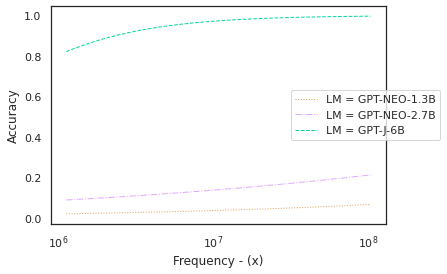

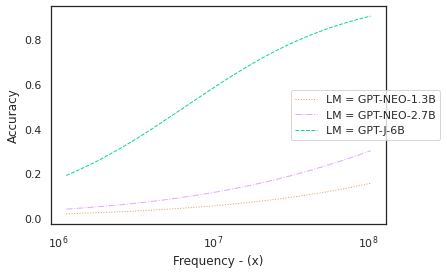

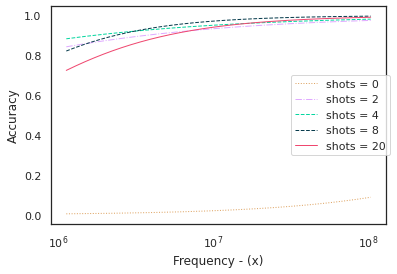

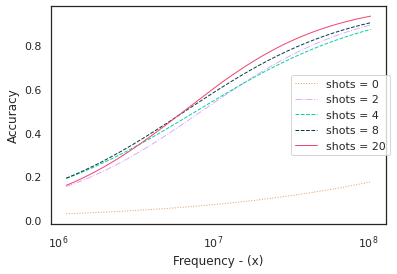

In [146]:
def draw_plots_1():
    save_logistic_regression_lines_plot_for_models('plus', ['gptjsmall', 'gptjlarge', 'gptj'], shot=8, key='x', show_plot=True)
    save_logistic_regression_lines_plot_for_models('mult', ['gptjsmall', 'gptjlarge', 'gptj'], shot=8, key='x', show_plot=True)
    save_logistic_regression_lines_plot_for_shots('plus', 'gptj', shots=[0, 2,4, 8, 20], key='x', show_plot=True)
    save_logistic_regression_lines_plot_for_shots('mult', 'gptj', shots=[0, 2,4, 8, 20], key='x', show_plot=True)
    for shot in [0, 2, 4, 8, 20]:
        save_freq_acc_plot_and_get_info('mult', shot, 'gptj', key='x', show_plot = False, quantile_number=10)

draw_plots_1()

Total Not Found for key xz is 215


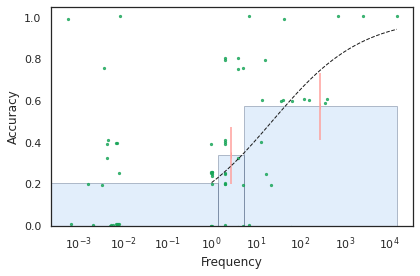

In [131]:
save_freq_acc_plot_and_get_info('day', 8, 'gptj', key='xz', show_plot=True, quantile_number=5)

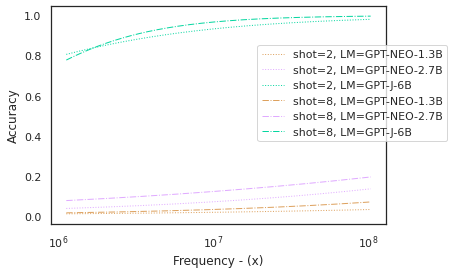

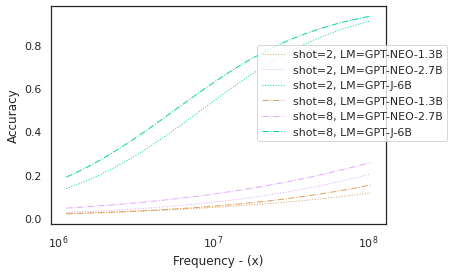

In [185]:
def draw_plots_2():
    save_logistic_regression_lines_plot_for_models_shots('plus', ['gptjsmall', 'gptjlarge', 'gptj'], shots=[2,8], key='x', show_plot=True)
    save_logistic_regression_lines_plot_for_models_shots('mult', ['gptjsmall', 'gptjlarge', 'gptj'], shots=[2,8], key='x', show_plot=True)
    # save_logistic_regression_lines_plot_for_shots('plus', 'gptj', shots=[0, 2,4, 8, 20], key='x', show_plot=True)
    # save_logistic_regression_lines_plot_for_shots('mult', 'gptj', shots=[0, 2,4, 8, 20], key='x', show_plot=True)
    # for shot in [0, 2, 4, 8, 20]:
    #     save_freq_acc_plot_and_get_info('mult', shot, 'gptj', key='x', show_plot = False, quantile_number=10)

draw_plots_2()

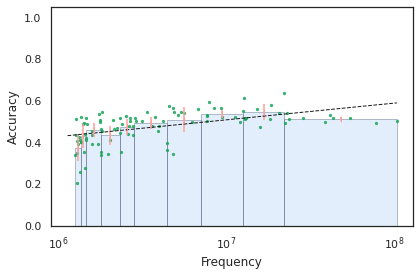

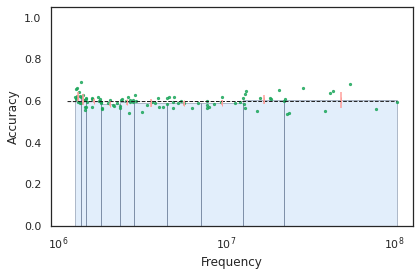

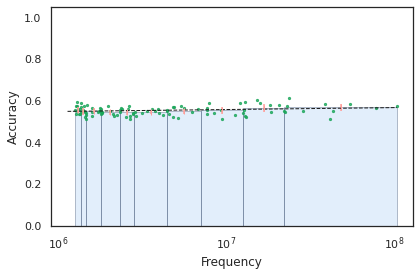

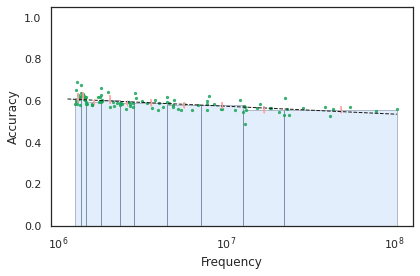

In [167]:
for shots in [0, 2, 4, 8]:
    save_freq_acc_plot_and_get_info('comparemoreless', shots, 'gptj', key='x', show_plot=True, quantile_number=10)